# Exploratory Data Analysis on LST -Land Surface temperature Bangladesh District in LST_day_1KM and LST_night _1KM

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

## Load the dataset and read the dataset and name the dataframe as LST_df

In [2]:
LST_df=pd.read_csv("../data/LST_BD_District.csv")
print(f'Shape of LST districts is: {LST_df.shape}')

Shape of LST districts is: (592, 117)


## Data Cleaning 

In [3]:
# Remove "1km" from column names
LST_df.columns = [column.replace('1km', '') for column in LST_df.columns]

# Now, the "1km" has been removed from the column names
print(LST_df.columns)

Index(['Date', 'LST_Day__Dhaka', 'LST_Night__Dhaka', 'LST_Day__Rajshahi',
       'LST_Night__Rajshahi', 'LST_Day__Chattogram', 'LST_Night__Chattogram',
       'LST_Day__Sylhet', 'LST_Night__Sylhet', 'LST_Day__Khulna',
       ...
       'LST_Day__Sherpur', 'LST_Night__Sherpur', 'LST_Day__Sirajganj',
       'LST_Night__Sirajganj', 'LST_Day__Sunamgan', 'LST_Night__Sunamgan',
       'LST_Day__Tangail', 'LST_Night__Tangail', 'LST_Day__Thakurgaon',
       'LST_Night__Thakurgaon'],
      dtype='object', length=117)


In [4]:
LST_df.head()

,Date,LST_Day__Dhaka,LST_Night__Dhaka,LST_Day__Rajshahi,LST_Night__Rajshahi,LST_Day__Chattogram,LST_Night__Chattogram,LST_Day__Sylhet,LST_Night__Sylhet,LST_Day__Khulna,...,LST_Day__Sherpur,LST_Night__Sherpur,LST_Day__Sirajganj,LST_Night__Sirajganj,LST_Day__Sunamgan,LST_Night__Sunamgan,LST_Day__Tangail,LST_Night__Tangail,LST_Day__Thakurgaon,LST_Night__Thakurgaon
0,"Jan 1, 2010",22.301,11.921,21.882,11.412,23.550,13.955,24.059,13.991,20.068,...,23.568,12.325,22.295,11.302,22.340,15.146,22.158,11.300,20.259,10.946
1,"Jan 9, 2010",22.981,11.086,22.207,9.838,23.387,13.465,23.294,13.060,20.589,...,24.090,12.130,22.326,10.496,22.406,14.627,22.223,10.386,21.501,10.847
2,"Jan 17, 2010",23.914,14.021,22.006,10.996,26.581,14.605,25.941,15.040,21.952,...,24.346,14.612,23.075,12.565,23.964,16.551,23.765,13.519,19.120,10.857
3,"Jan 25, 2010",25.468,14.089,25.126,12.504,26.375,14.374,25.249,13.661,22.910,...,25.238,14.627,25.148,13.187,23.916,15.459,25.138,13.699,24.109,11.669
4,"Feb 2, 2010",24.915,14.202,24.925,12.773,26.083,13.988,24.760,12.509,23.227,...,23.046,14.448,24.421,13.808,22.815,14.351,24.399,13.870,23.747,11.011


In [5]:
LST_df['Date'].unique()

array(['Jan 1, 2010', 'Jan 9, 2010', 'Jan 17, 2010', 'Jan 25, 2010',
       'Feb 2, 2010', 'Feb 10, 2010', 'Feb 18, 2010', 'Feb 26, 2010',
       'Mar 6, 2010', 'Mar 14, 2010', 'Mar 22, 2010', 'Mar 30, 2010',
       'Apr 7, 2010', 'Apr 15, 2010', 'Apr 23, 2010', 'May 1, 2010',
       'May 9, 2010', 'May 17, 2010', 'May 25, 2010', 'Jun 2, 2010',
       'Jun 10, 2010', 'Jun 18, 2010', 'Jun 26, 2010', 'Jul 4, 2010',
       'Jul 12, 2010', 'Jul 20, 2010', 'Jul 28, 2010', 'Aug 5, 2010',
       'Aug 13, 2010', 'Aug 21, 2010', 'Aug 29, 2010', 'Sep 6, 2010',
       'Sep 14, 2010', 'Sep 22, 2010', 'Sep 30, 2010', 'Oct 8, 2010',
       'Oct 16, 2010', 'Oct 24, 2010', 'Nov 1, 2010', 'Nov 9, 2010',
       'Nov 17, 2010', 'Nov 25, 2010', 'Dec 3, 2010', 'Dec 11, 2010',
       'Dec 19, 2010', 'Dec 27, 2010', 'Jan 1, 2011', 'Jan 9, 2011',
       'Jan 17, 2011', 'Jan 25, 2011', 'Feb 2, 2011', 'Feb 10, 2011',
       'Feb 18, 2011', 'Feb 26, 2011', 'Mar 6, 2011', 'Mar 14, 2011',
       'Mar 22, 2011', 'M

##### We can see dataset here available from 2010 till 2020 but the frequency of data collected days are random not on daily basis 

### Missing Values

In [6]:
LST_df.isna().sum()

Date                       0
LST_Day__Dhaka            26
LST_Night__Dhaka         103
LST_Day__Rajshahi         17
LST_Night__Rajshahi       81
                        ... 
LST_Night__Sunamgan       85
LST_Day__Tangail          26
LST_Night__Tangail        82
LST_Day__Thakurgaon       73
LST_Night__Thakurgaon     74
Length: 117, dtype: int64

### Replace Missing Values with mean and  using Fillna method

In [7]:
LST_df.describe()

,LST_Day__Dhaka,LST_Night__Dhaka,LST_Day__Rajshahi,LST_Night__Rajshahi,LST_Day__Chattogram,LST_Night__Chattogram,LST_Day__Sylhet,LST_Night__Sylhet,LST_Day__Khulna,LST_Night__Khulna,...,LST_Day__Sherpur,LST_Night__Sherpur,LST_Day__Sirajganj,LST_Night__Sirajganj,LST_Day__Sunamgan,LST_Night__Sunamgan,LST_Day__Tangail,LST_Night__Tangail,LST_Day__Thakurgaon,LST_Night__Thakurgaon
count,566.000000,489.000000,575.000000,511.000000,581.000000,506.000000,563.000000,503.000000,577.000000,534.000000,...,532.000000,497.000000,573.000000,514.000000,571.000000,507.000000,566.000000,510.000000,519.000000,518.000000
mean,27.832042,20.628955,27.700337,20.464252,27.830225,20.520775,27.198325,20.436652,26.404205,21.814629,...,26.656643,20.178885,26.501389,20.501325,25.728678,21.224247,26.941956,20.403539,26.806736,19.448693
std,3.153387,4.408042,3.488975,4.783094,2.663612,3.822746,2.944226,4.300167,2.998782,3.698596,...,3.200347,4.275504,3.423244,4.650173,2.503089,4.067825,3.240761,4.583744,4.949344,5.149585
min,16.170000,10.798000,18.330000,9.591000,20.036000,10.971000,3.644000,11.514000,10.010000,12.630000,...,7.084000,10.207000,5.382000,10.103000,17.789000,12.968000,-2.463000,10.076000,-14.384000,8.235000
25%,25.625000,16.803000,25.643000,16.394000,26.187000,17.280500,25.276000,16.601500,24.308000,18.978250,...,24.745750,16.729000,24.624000,16.784750,23.922500,17.610500,24.924250,16.691750,24.995500,15.184500
50%,28.411500,21.630000,28.338000,21.632000,27.963000,21.562000,27.484000,20.848000,27.011000,23.054500,...,27.093500,20.721000,27.199000,21.286000,25.936000,21.221000,27.700000,21.175500,27.887000,20.174000
75%,30.082000,24.490000,29.829500,24.777000,29.533000,23.689000,29.222500,24.044500,28.580000,24.955000,...,28.730500,23.768000,28.887000,24.680000,27.737000,24.983500,29.101250,24.452750,29.351000,23.890750
max,36.177000,29.280000,36.638000,28.122000,35.480000,26.708000,35.867000,28.941000,32.931000,27.283000,...,35.280000,28.384000,33.560000,28.077000,31.259000,28.860000,33.698000,28.482000,36.225000,27.941000


In [8]:
for column in LST_df.columns:
    if any(LST_df[column].isnull()):
        if LST_df[column].dtype=='int' or LST_df[column].dtype=='float':
                 LST_df[column].fillna(LST_df[column].mean(),inplace=True)
        elif LST_df[column].dtype=='object':
                 LST_df[column].fillna(LST_df[column].mode().iloc[0],inplace=True)
LST_df.isnull().sum()

Date                     0
LST_Day__Dhaka           0
LST_Night__Dhaka         0
LST_Day__Rajshahi        0
LST_Night__Rajshahi      0
                        ..
LST_Night__Sunamgan      0
LST_Day__Tangail         0
LST_Night__Tangail       0
LST_Day__Thakurgaon      0
LST_Night__Thakurgaon    0
Length: 117, dtype: int64

#### Check any Duplicates

In [9]:
# Check is there any duplicates
LST_df.duplicated().sum()

0

In [11]:
LST_df['Date'] = pd.to_datetime(LST_df['Date'])
LST_df.set_index('Date', inplace=True)

In [12]:
LST_df.dtypes

LST_Day__Dhaka           float64
LST_Night__Dhaka         float64
LST_Day__Rajshahi        float64
LST_Night__Rajshahi      float64
LST_Day__Chattogram      float64
                          ...   
LST_Night__Sunamgan      float64
LST_Day__Tangail         float64
LST_Night__Tangail       float64
LST_Day__Thakurgaon      float64
LST_Night__Thakurgaon    float64
Length: 116, dtype: object

## Outliers

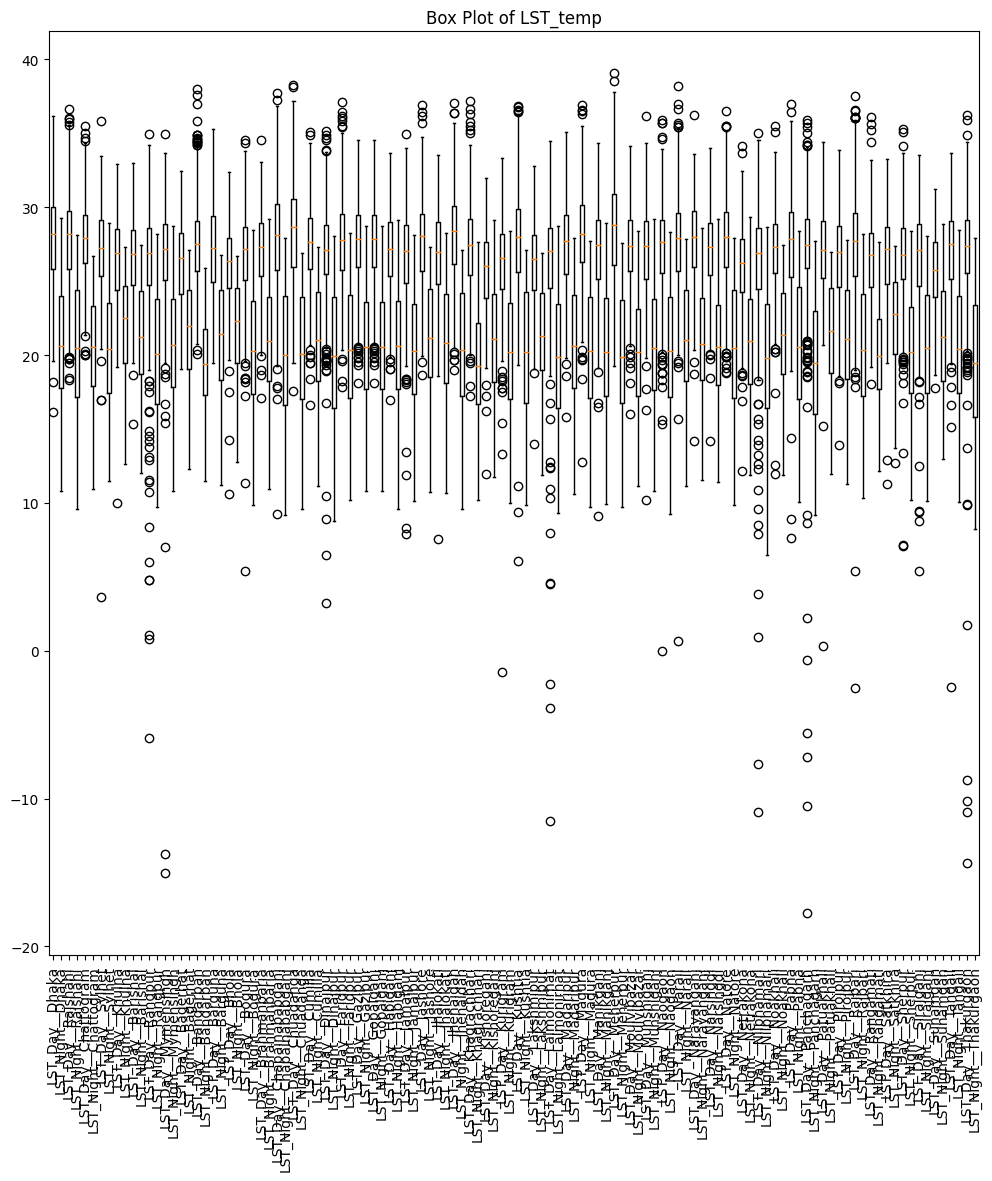

In [13]:
numeric_columns =LST_df.select_dtypes(include=['float64'])
plt.figure(figsize=(12, 12))
plt.boxplot(numeric_columns.values, labels=numeric_columns.columns)
plt.title("Box Plot of LST_temp")
plt.xticks(rotation=90)
plt.show()

Dataframe is not normal there are outliers

### Remove Outliers

In [14]:
# Define a function to remove outliers based on IQR
def remove_outliers(LST_df, columns):
    for col in columns:
        Q1 = LST_df[col].quantile(0.25)
        Q3 = LST_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        LST_df = LST_df[(LST_df[col] >= lower_bound) & (LST_df[col] <= upper_bound)]
    return LST_df

# Select the numeric columns for outlier removal
numeric_columns = LST_df.select_dtypes(include=['float64'])

# Remove outliers
LST_df_no_outliers = remove_outliers(LST_df, numeric_columns.columns)


In [15]:
LST_df_no_outliers.head()

,LST_Day__Dhaka,LST_Night__Dhaka,LST_Day__Rajshahi,LST_Night__Rajshahi,LST_Day__Chattogram,LST_Night__Chattogram,LST_Day__Sylhet,LST_Night__Sylhet,LST_Day__Khulna,LST_Night__Khulna,...,LST_Day__Sherpur,LST_Night__Sherpur,LST_Day__Sirajganj,LST_Night__Sirajganj,LST_Day__Sunamgan,LST_Night__Sunamgan,LST_Day__Tangail,LST_Night__Tangail,LST_Day__Thakurgaon,LST_Night__Thakurgaon
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-09,22.981,11.086,22.207,9.838,23.387,13.465,23.294,13.060,20.589,14.794,...,24.090,12.130,22.326,10.496,22.406,14.627,22.223,10.386,21.501,10.847
2010-01-25,25.468,14.089,25.126,12.504,26.375,14.374,25.249,13.661,22.910,15.406,...,25.238,14.627,25.148,13.187,23.916,15.459,25.138,13.699,24.109,11.669
2010-02-02,24.915,14.202,24.925,12.773,26.083,13.988,24.760,12.509,23.227,16.047,...,23.046,14.448,24.421,13.808,22.815,14.351,24.399,13.870,23.747,11.011
2010-02-10,26.469,17.978,26.488,17.194,26.608,17.604,26.913,15.867,23.949,19.193,...,25.896,17.846,25.204,18.212,25.220,17.239,25.278,18.086,26.494,14.102
2010-02-18,26.652,15.972,26.691,15.778,26.074,17.003,25.877,14.705,24.041,18.979,...,24.766,16.688,25.540,16.302,23.713,16.166,25.648,16.200,26.680,13.554


##### Dataset without outliers

##### Shape of datasets

In [16]:
print(LST_df.shape)
print(LST_df_no_outliers.shape)

(592, 116)
(426, 116)


### Correlation Matrix

In [17]:
LST_df_no_outliers.corr()

,LST_Day__Dhaka,LST_Night__Dhaka,LST_Day__Rajshahi,LST_Night__Rajshahi,LST_Day__Chattogram,LST_Night__Chattogram,LST_Day__Sylhet,LST_Night__Sylhet,LST_Day__Khulna,LST_Night__Khulna,...,LST_Day__Sherpur,LST_Night__Sherpur,LST_Day__Sirajganj,LST_Night__Sirajganj,LST_Day__Sunamgan,LST_Night__Sunamgan,LST_Day__Tangail,LST_Night__Tangail,LST_Day__Thakurgaon,LST_Night__Thakurgaon
LST_Day__Dhaka,1.000000,0.702170,0.836154,0.690303,0.746818,0.721696,0.737499,0.670712,0.844089,0.734266,...,0.700216,0.682834,0.855039,0.688893,0.773559,0.604423,0.863132,0.677795,0.704247,0.624057
LST_Night__Dhaka,0.702170,1.000000,0.754395,0.907938,0.589953,0.907706,0.643376,0.891769,0.776970,0.925075,...,0.743234,0.894880,0.708468,0.936152,0.687333,0.861526,0.751873,0.947767,0.726493,0.877574
LST_Day__Rajshahi,0.836154,0.754395,1.000000,0.782901,0.754974,0.789303,0.693653,0.704205,0.862820,0.803917,...,0.737263,0.734408,0.871629,0.765918,0.703204,0.635049,0.881935,0.745441,0.830986,0.742338
LST_Night__Rajshahi,0.690303,0.907938,0.782901,1.000000,0.580801,0.897997,0.624004,0.891303,0.789359,0.919072,...,0.753669,0.918141,0.699491,0.945121,0.676502,0.848923,0.757395,0.939790,0.747158,0.936813
LST_Day__Chattogram,0.746818,0.589953,0.754974,0.580801,1.000000,0.621711,0.730459,0.488054,0.789346,0.608233,...,0.536151,0.571205,0.704745,0.569816,0.628651,0.403805,0.701047,0.565833,0.570665,0.541730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LST_Night__Sunamgan,0.604423,0.861526,0.635049,0.848923,0.403805,0.800916,0.576985,0.950163,0.625290,0.827558,...,0.786996,0.872364,0.614948,0.858426,0.675324,1.000000,0.676495,0.875304,0.693373,0.833342
LST_Day__Tangail,0.863132,0.751873,0.881935,0.757395,0.701047,0.759840,0.738939,0.725056,0.817304,0.783620,...,0.799445,0.751350,0.949888,0.774336,0.772767,0.676495,1.000000,0.751097,0.781885,0.722596
LST_Night__Tangail,0.677795,0.947767,0.745441,0.939790,0.565833,0.886235,0.630765,0.909061,0.752074,0.907696,...,0.749952,0.943772,0.685048,0.965710,0.667381,0.875304,0.751097,1.000000,0.730190,0.918185
LST_Day__Thakurgaon,0.704247,0.726493,0.830986,0.747158,0.570665,0.726690,0.639054,0.723677,0.725823,0.757364,...,0.772021,0.725326,0.752222,0.743615,0.677588,0.693373,0.781885,0.730190,1.000000,0.734936


### Plot the coorelation matrix 

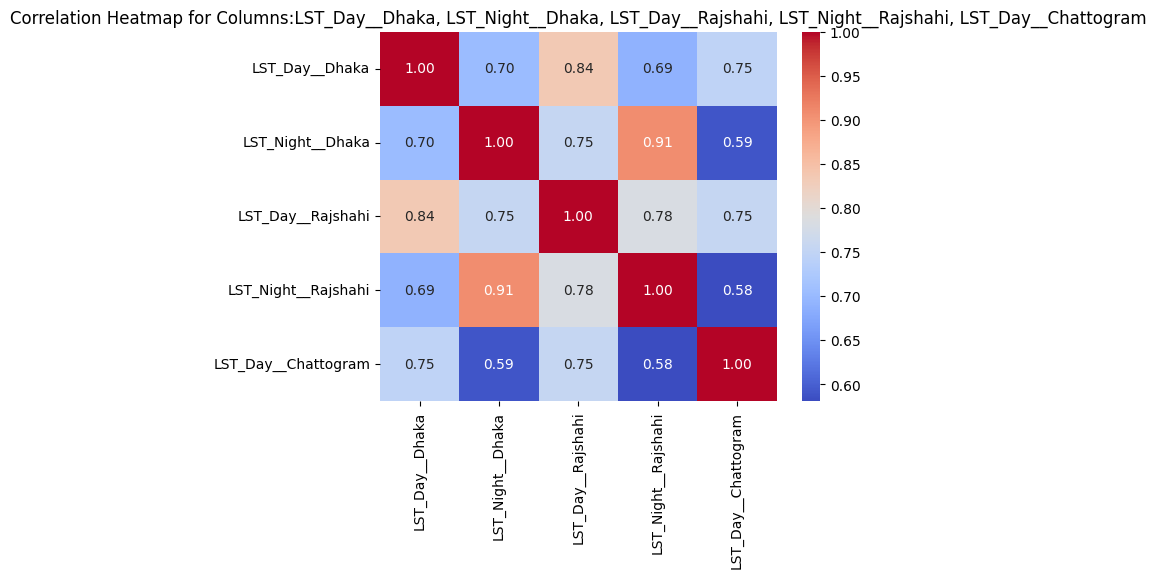

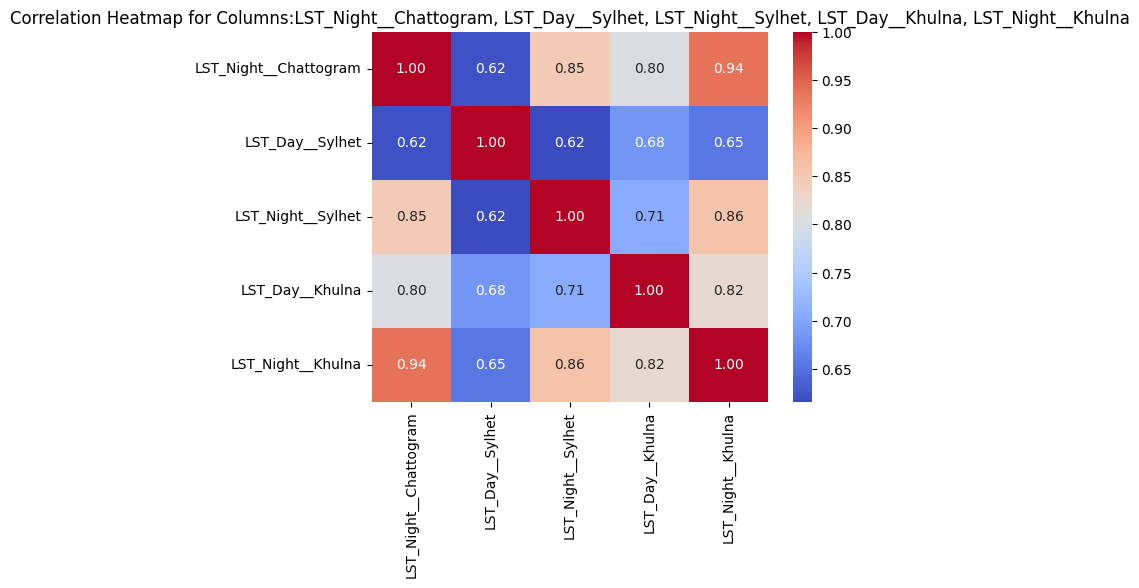

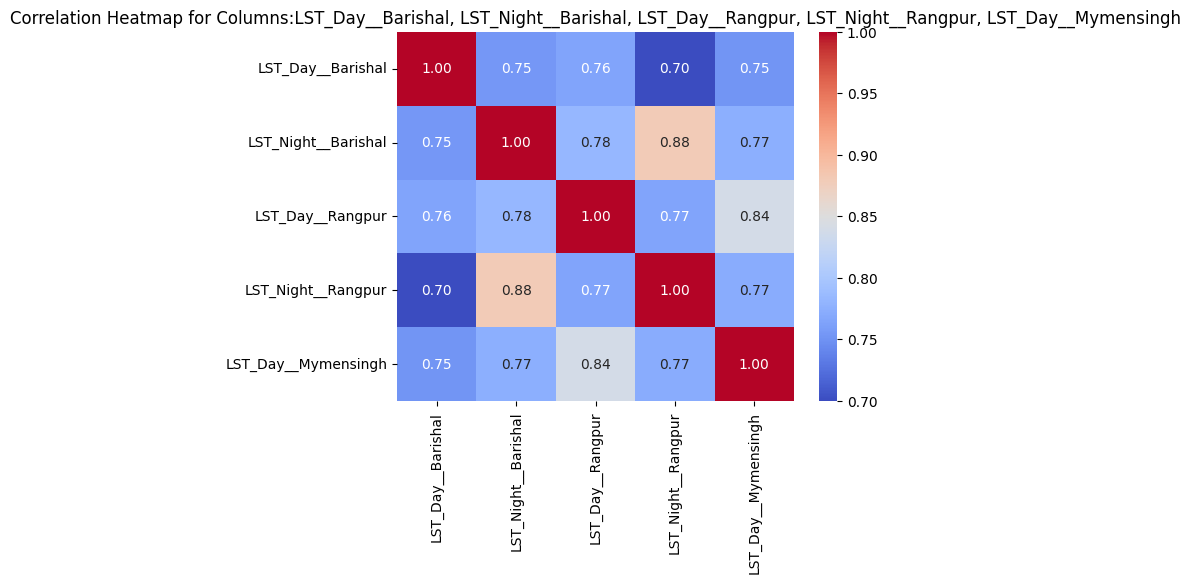

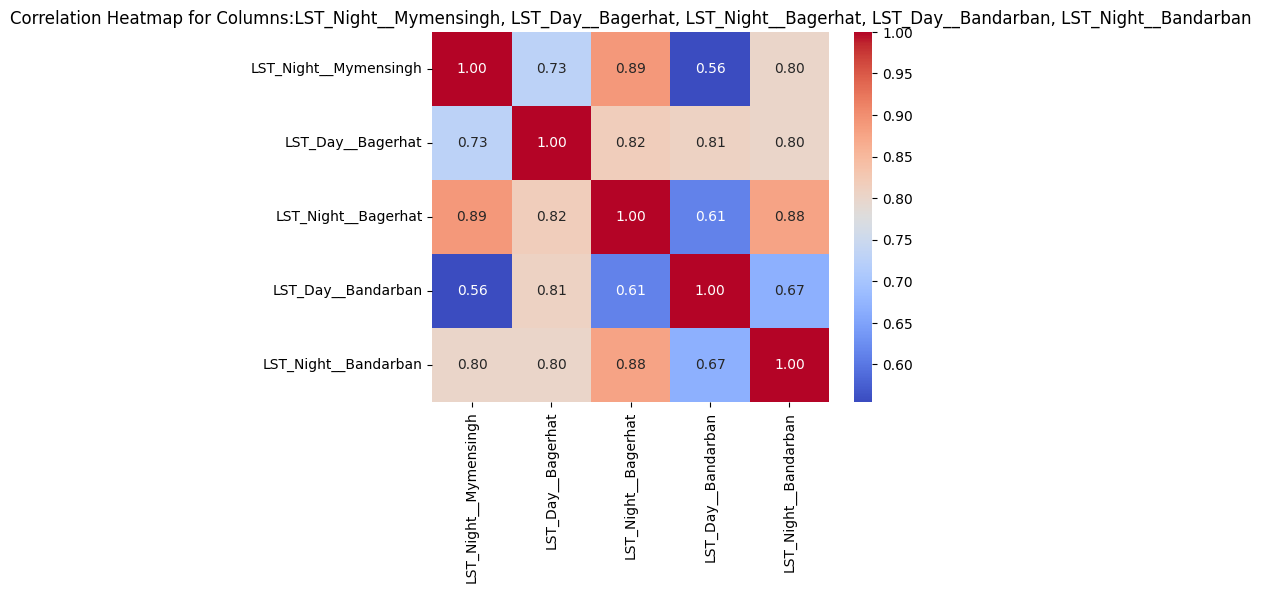

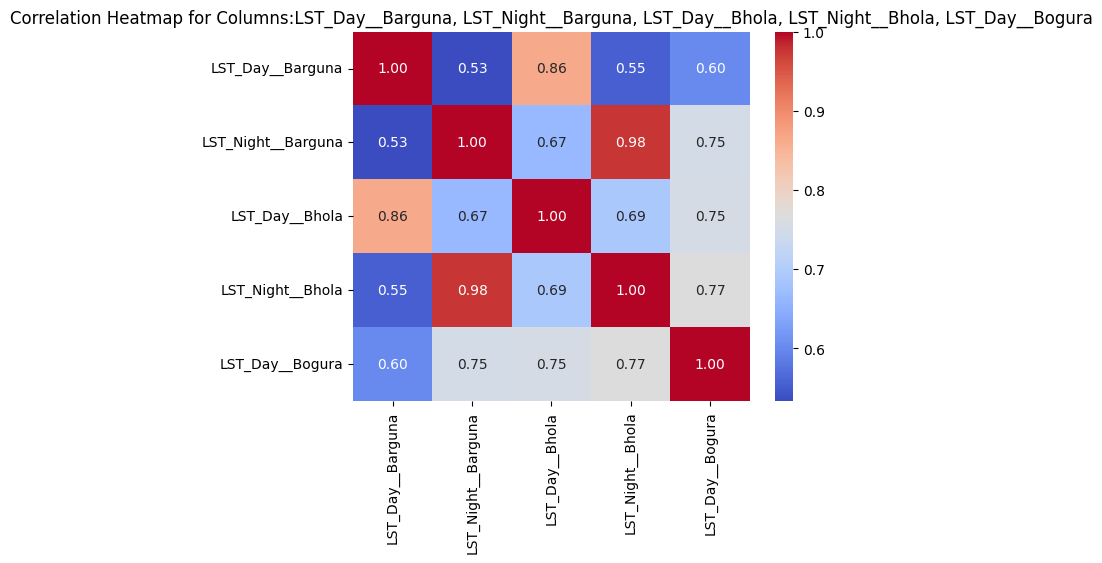

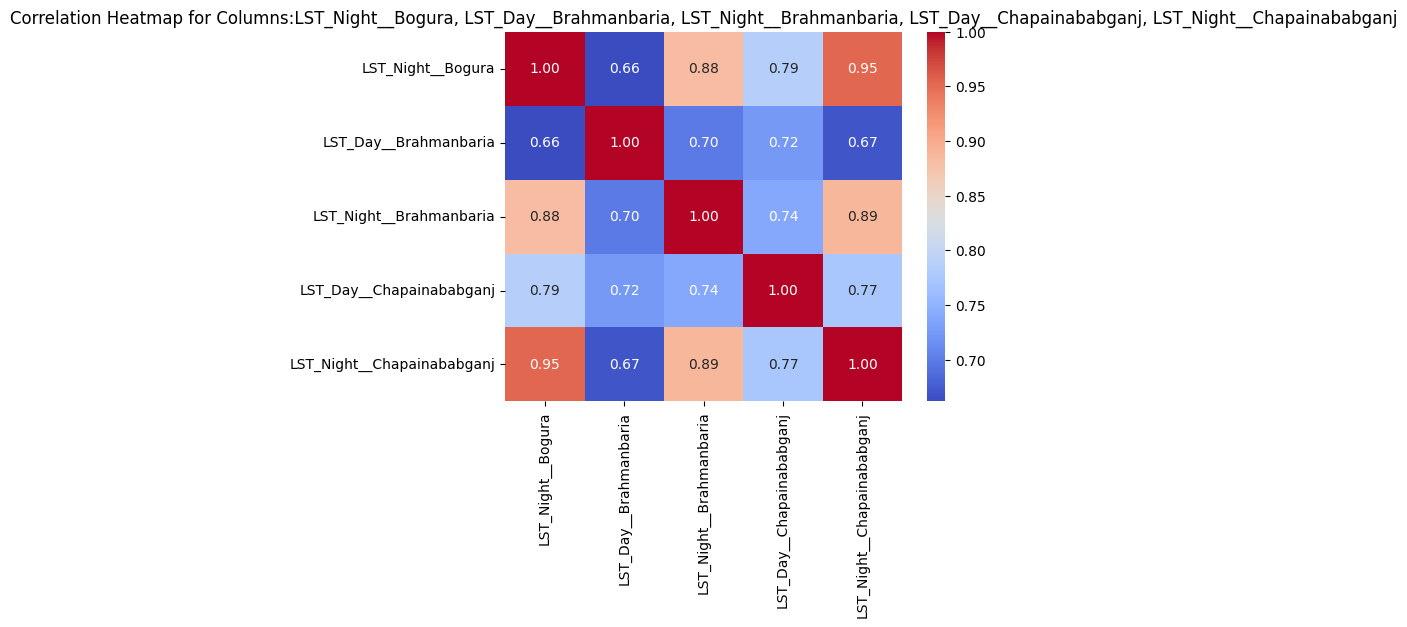

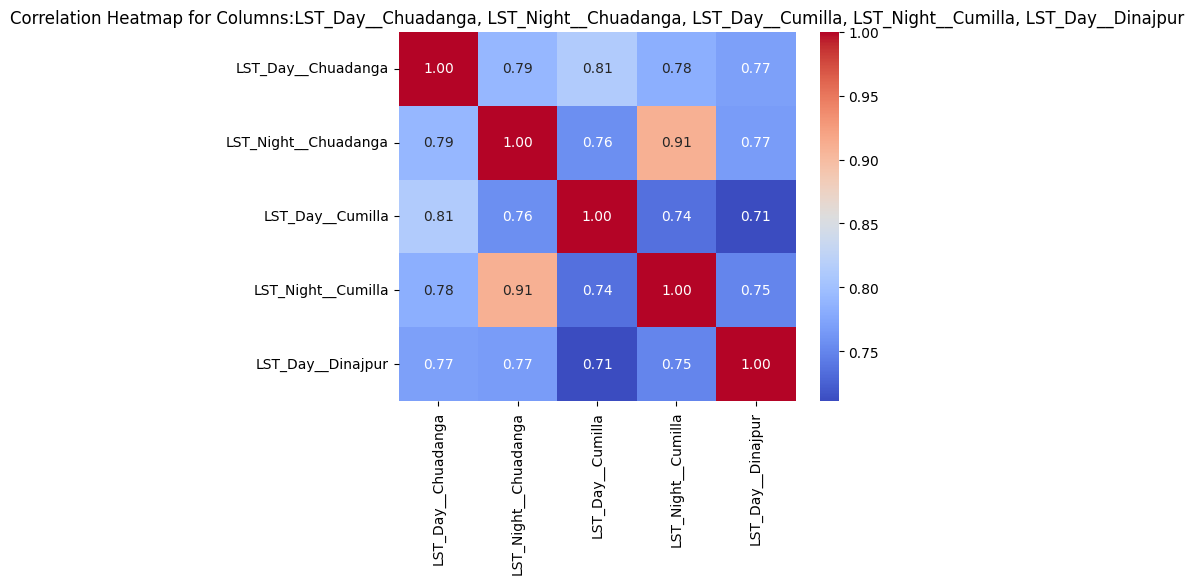

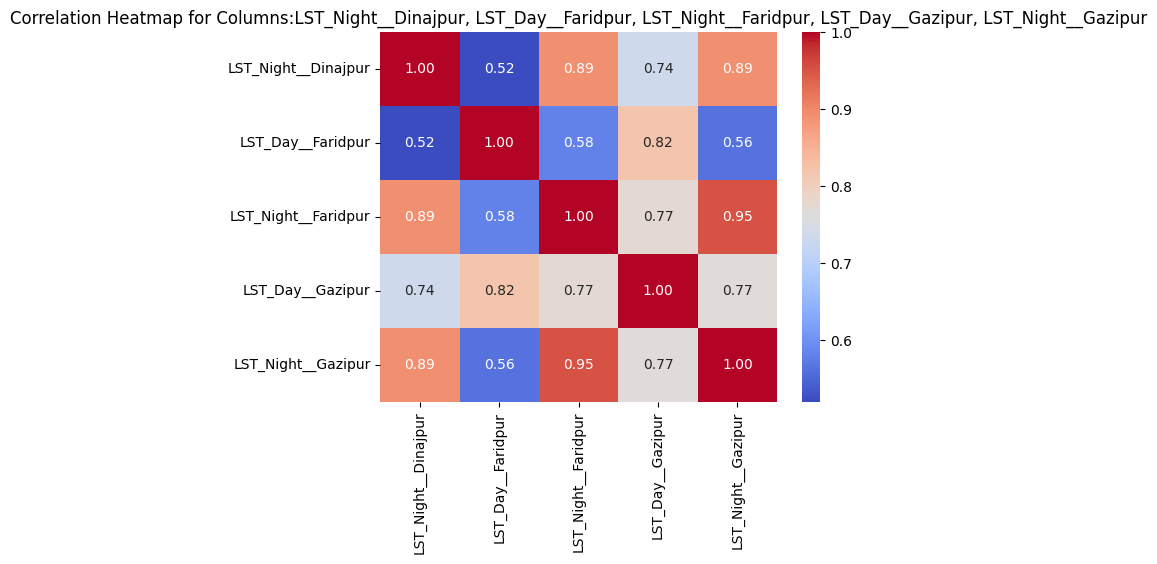

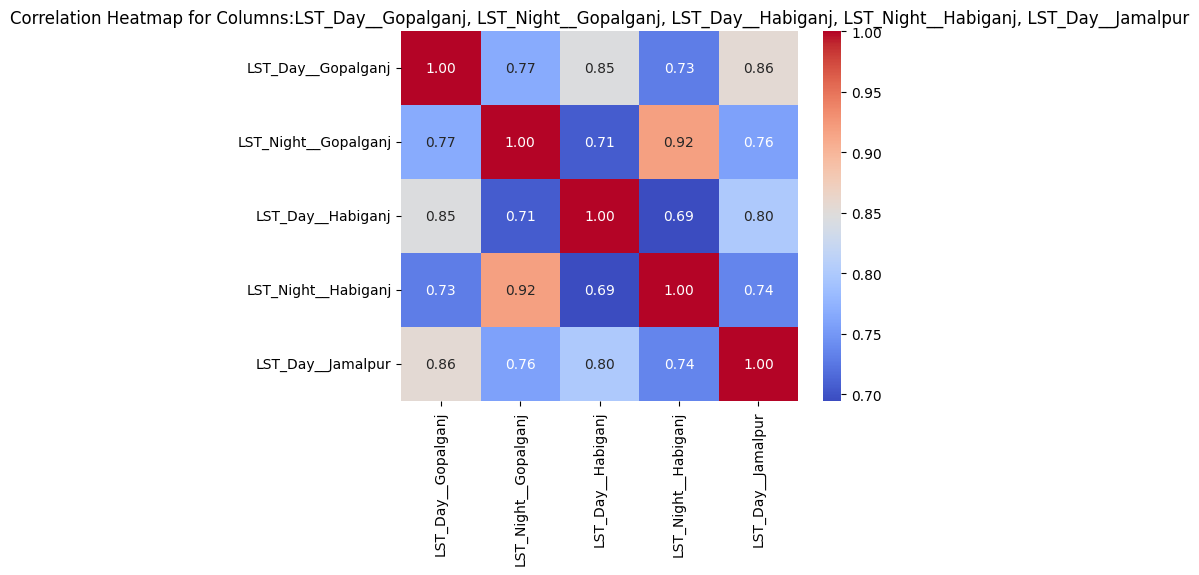

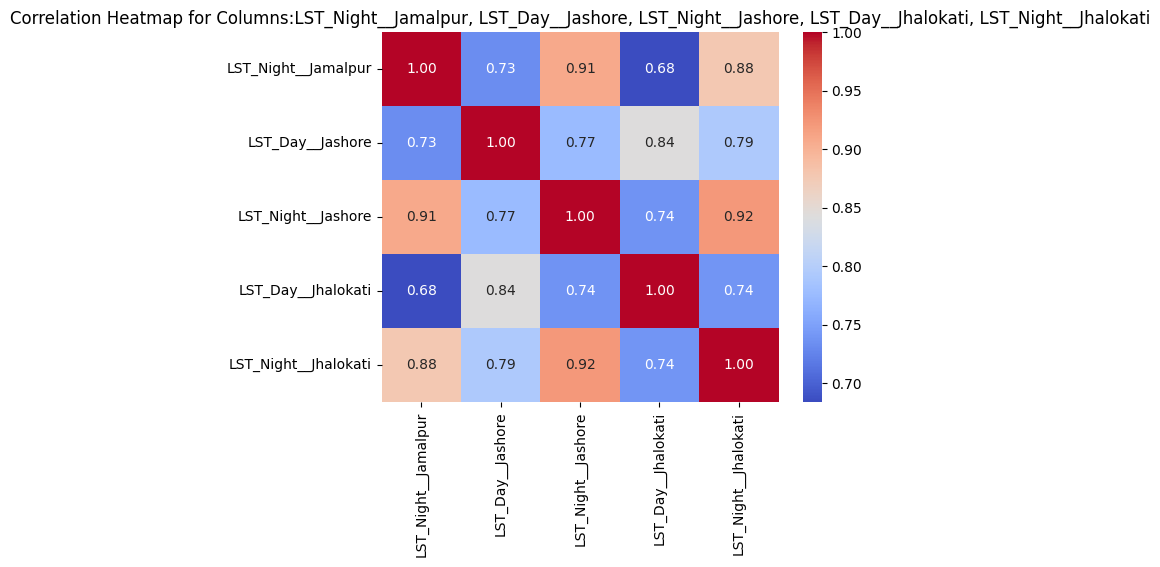

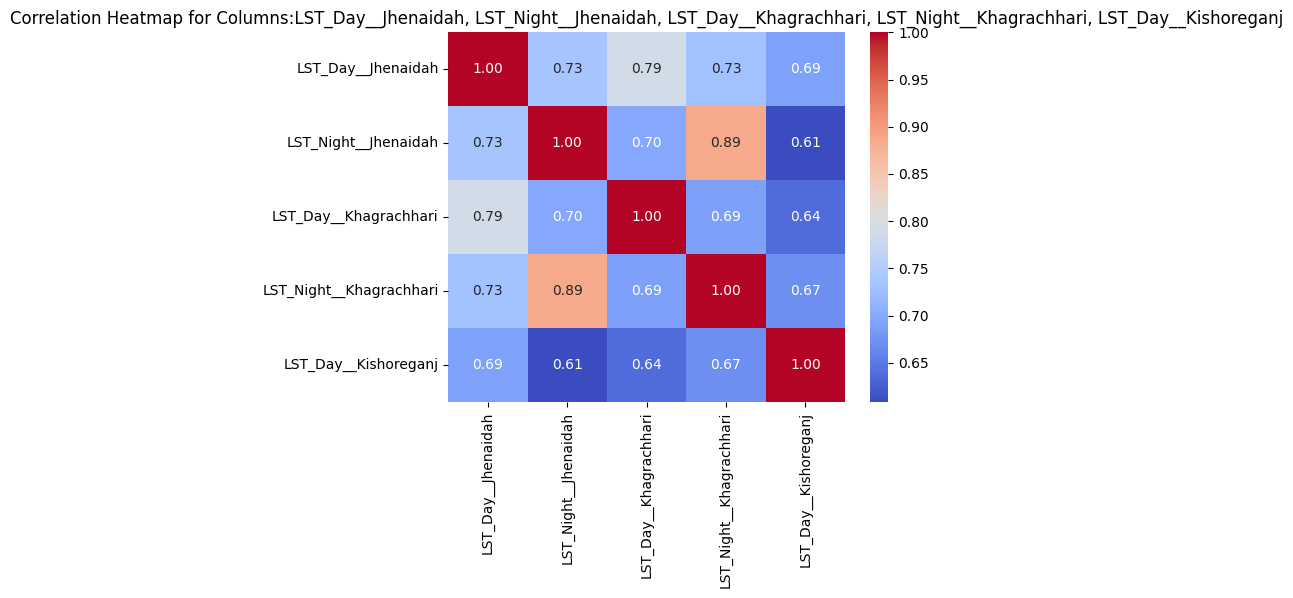

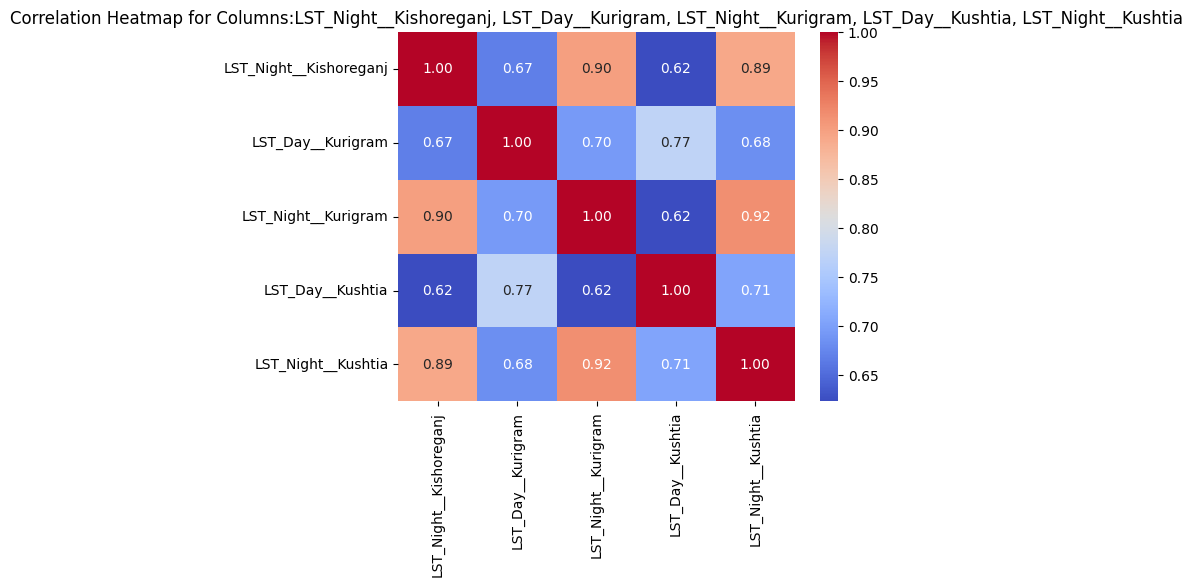

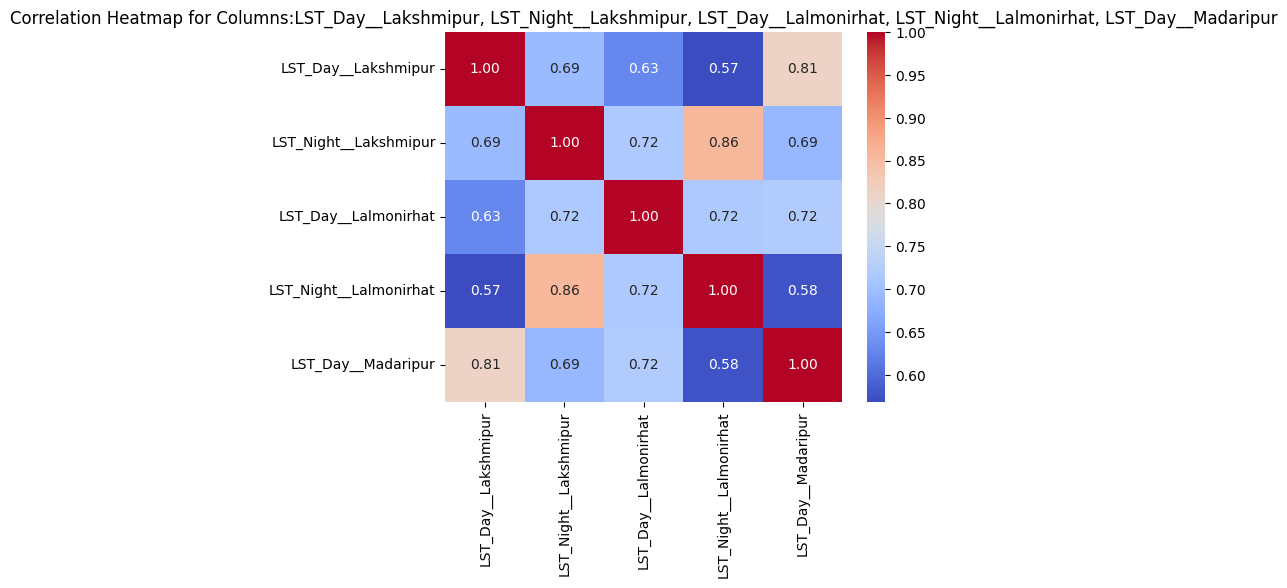

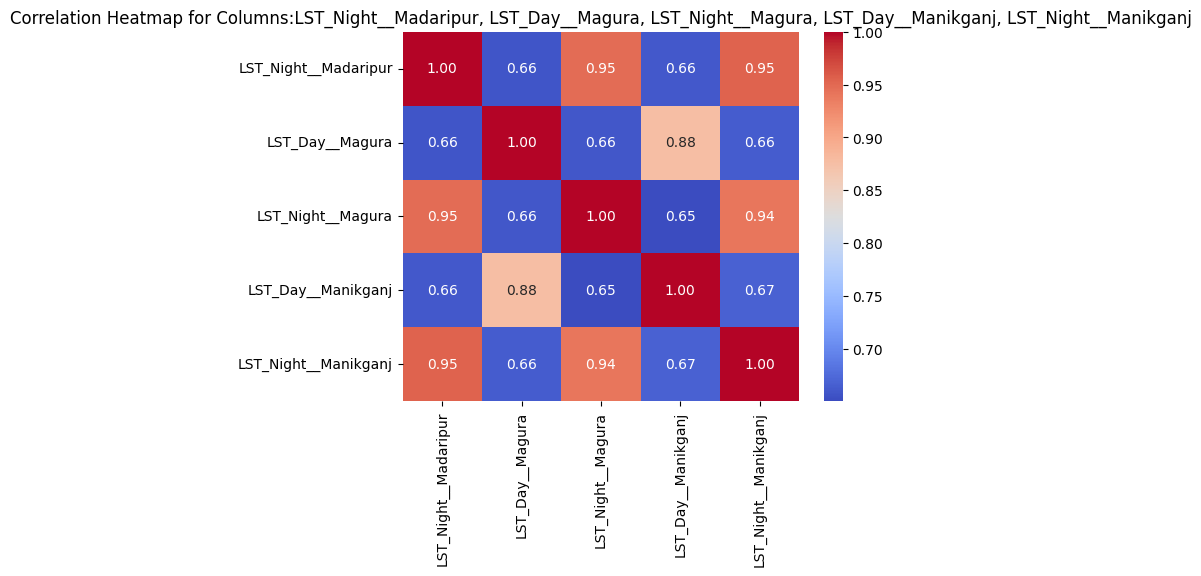

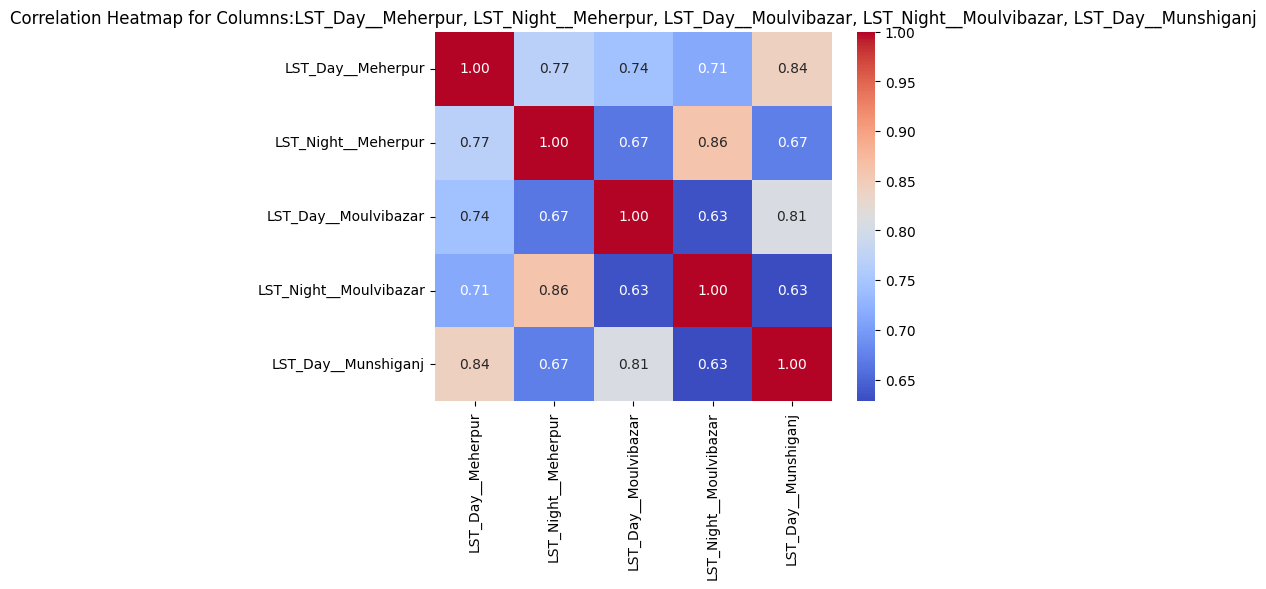

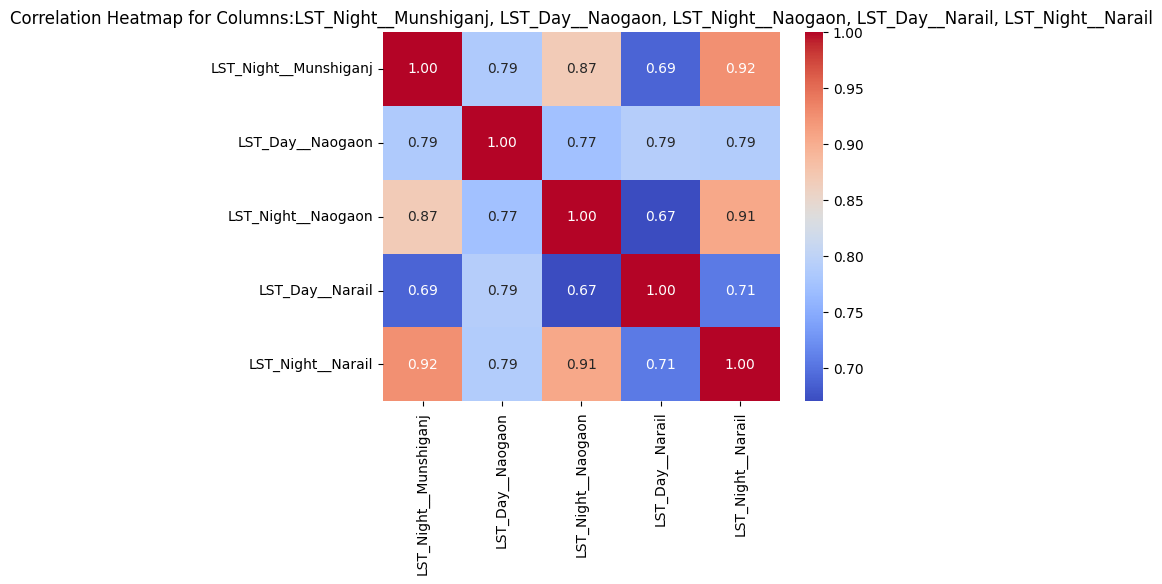

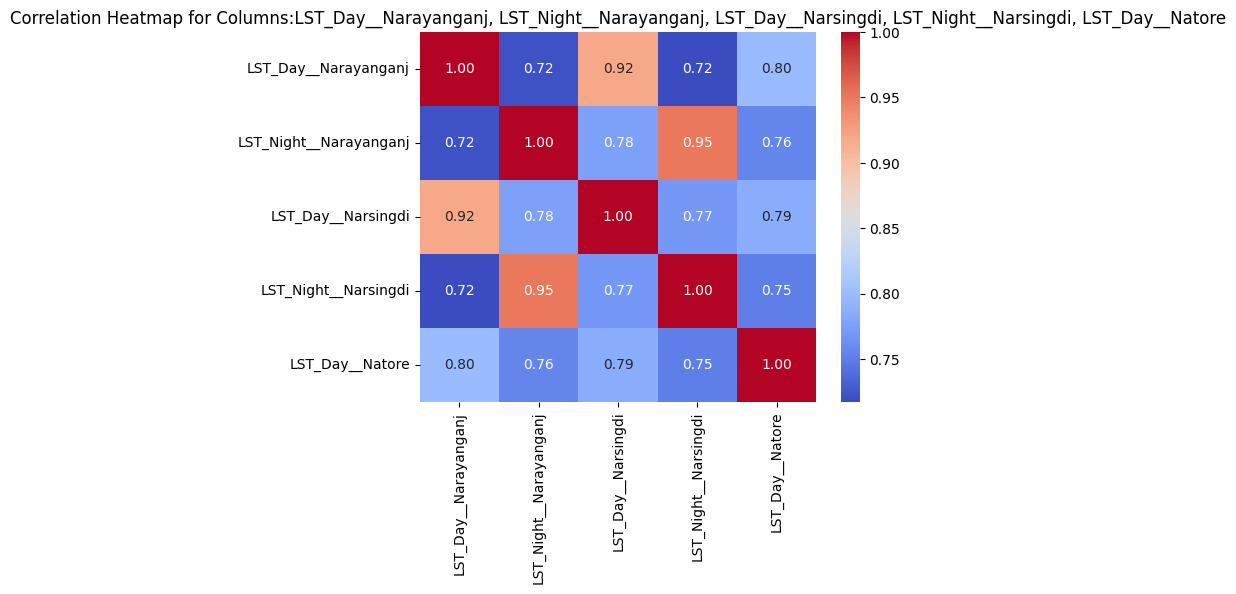

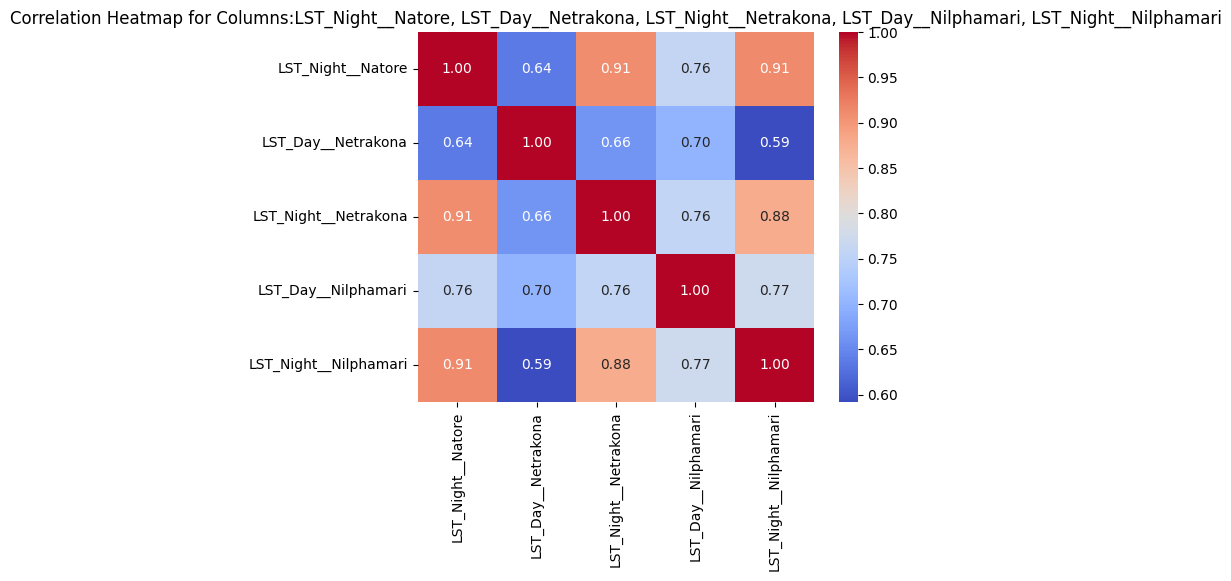

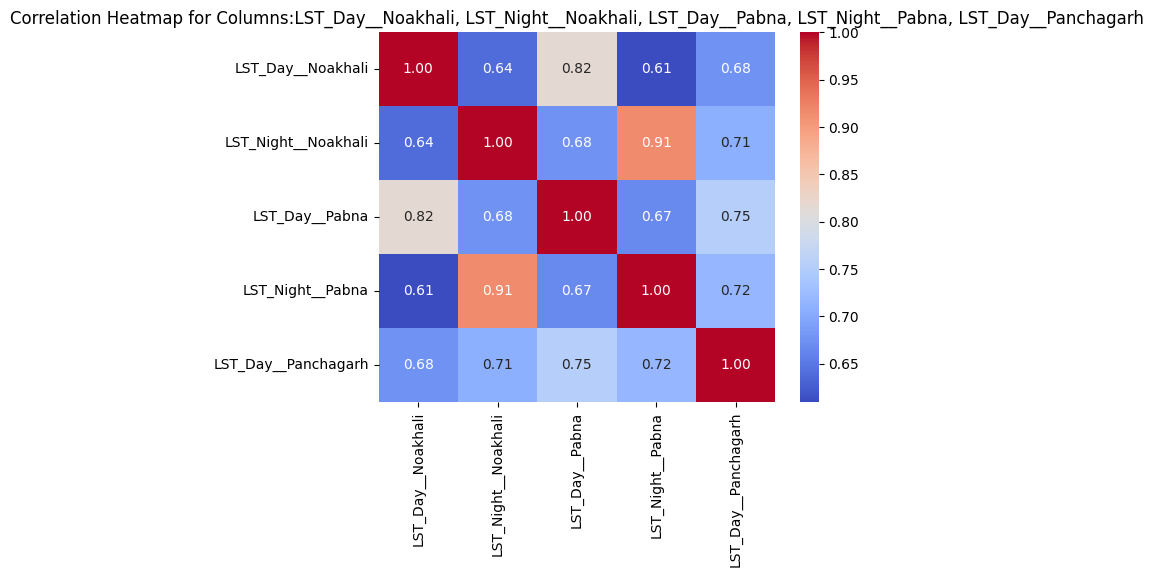

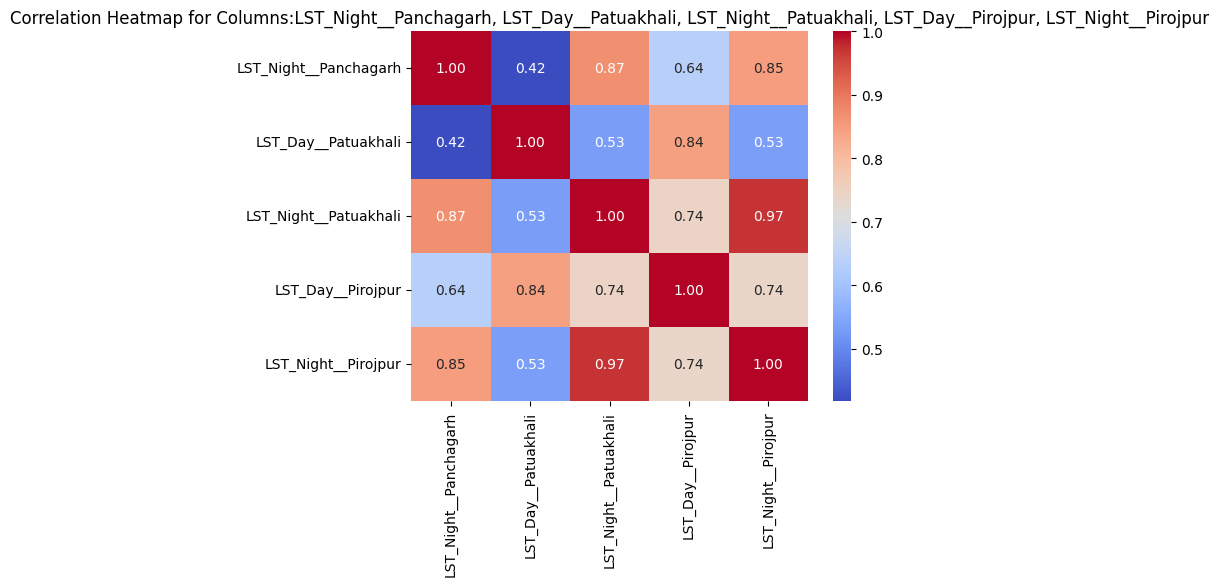

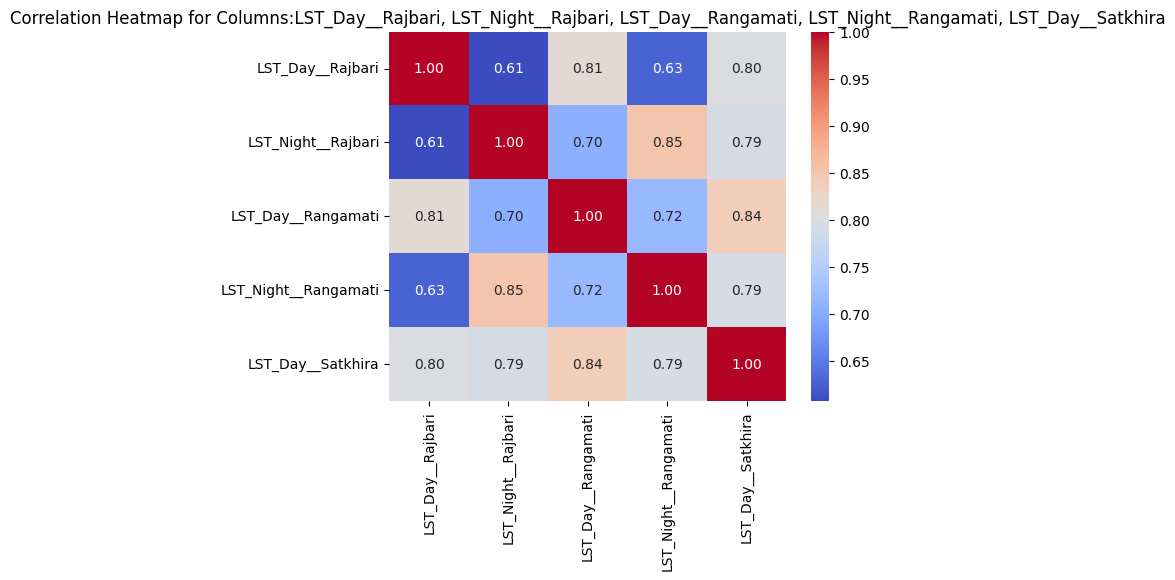

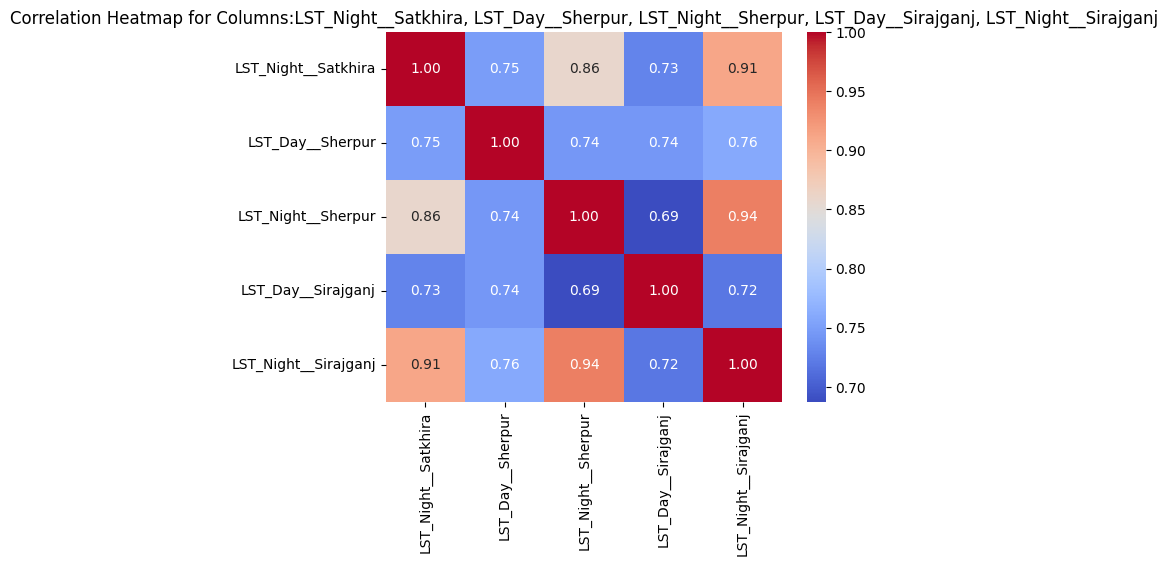

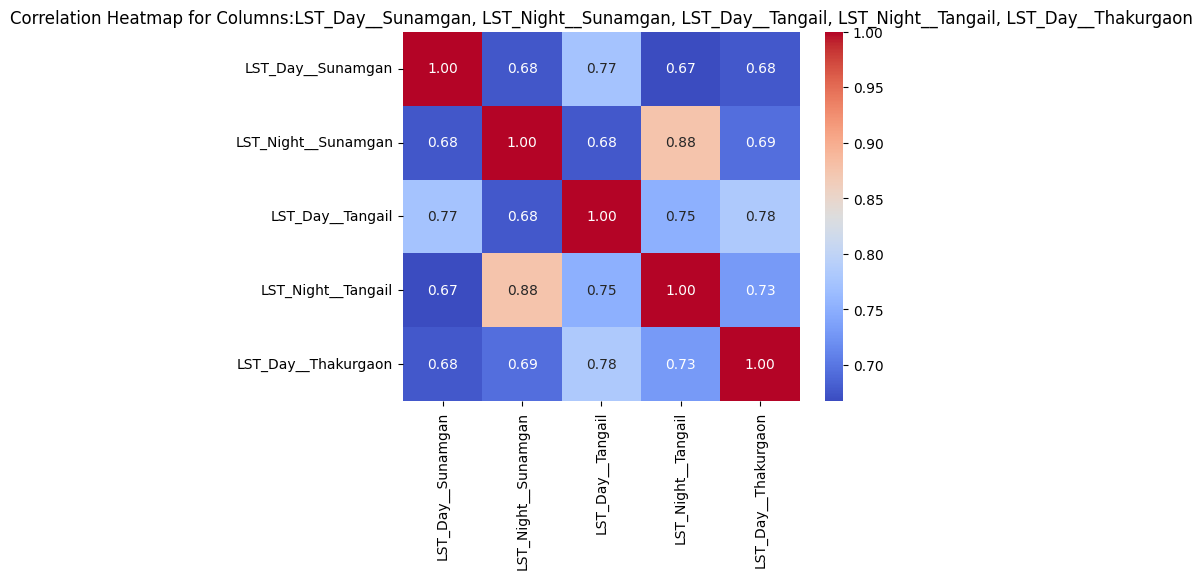

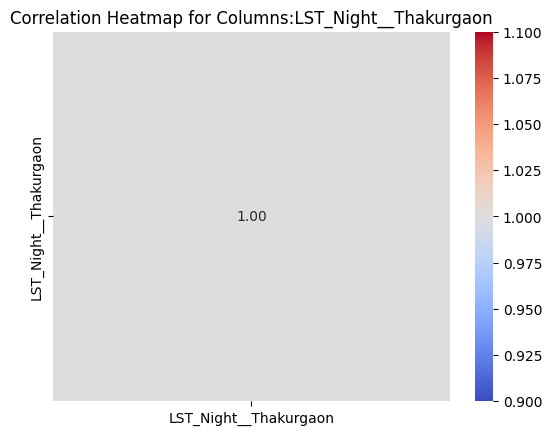

In [18]:
columns =LST_df_no_outliers.columns
for i in range(0,len(columns),5):
    subset_columns =columns[i:i+5]
    subset_df= LST_df_no_outliers[subset_columns]
    correlation_matrix= subset_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
    plt.title(f'Correlation Heatmap for Columns:{", ".join(subset_columns)}')
    plt.show()

## Time Series Analysis

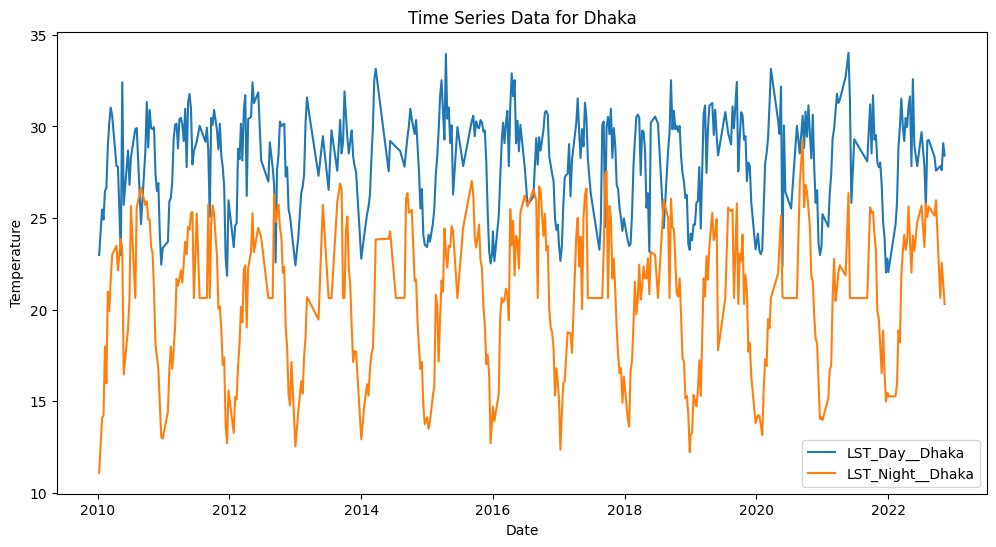

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Dhaka'], label='LST_Day__Dhaka')
plt.plot(LST_df_no_outliers['LST_Night__Dhaka'], label='LST_Night__Dhaka')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Dhaka')
plt.legend()
plt.show()

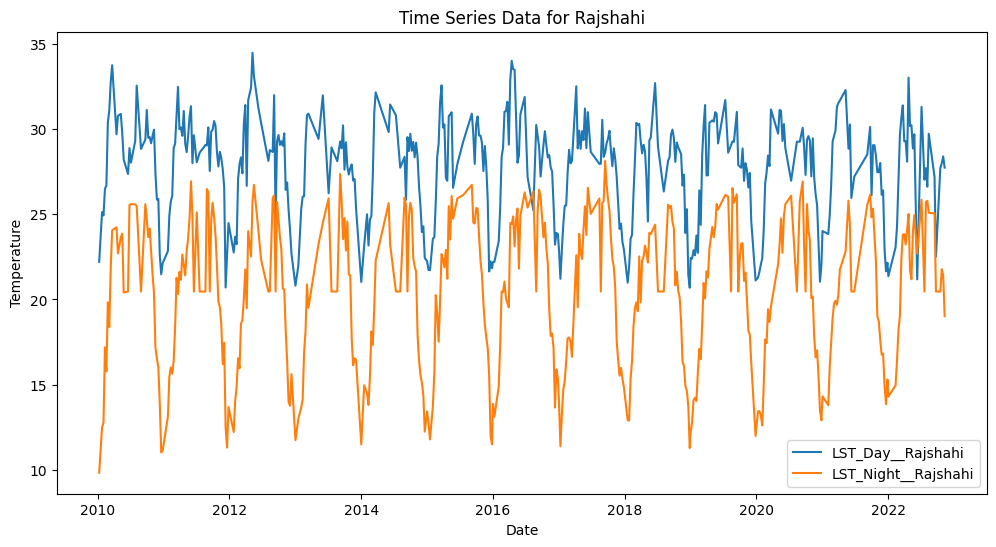

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Rajshahi'], label='LST_Day__Rajshahi')
plt.plot(LST_df_no_outliers['LST_Night__Rajshahi'], label='LST_Night__Rajshahi')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Rajshahi')
plt.legend()
plt.show()

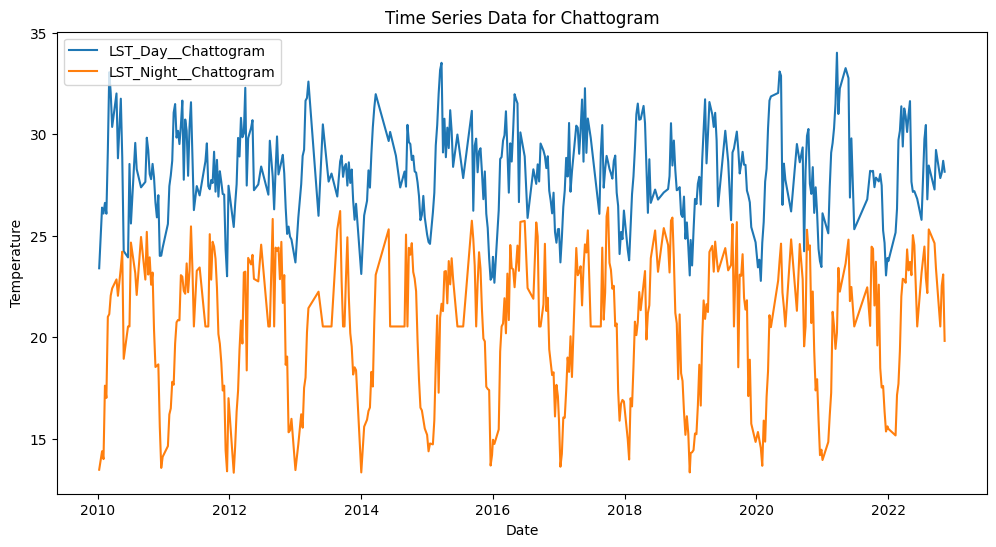

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Chattogram'], label='LST_Day__Chattogram')
plt.plot(LST_df_no_outliers['LST_Night__Chattogram'], label='LST_Night__Chattogram')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Chattogram')
plt.legend()
plt.show()

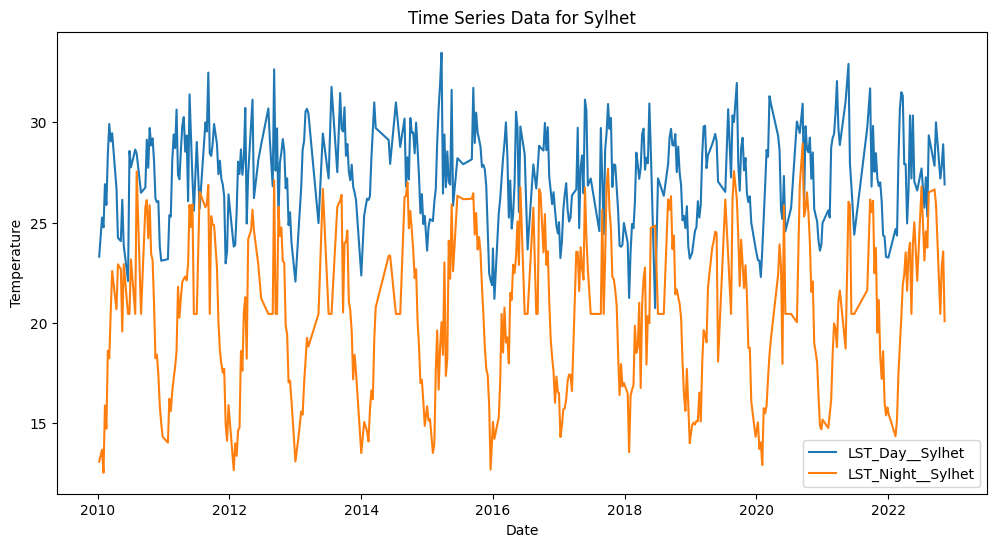

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Sylhet'], label='LST_Day__Sylhet')
plt.plot(LST_df_no_outliers['LST_Night__Sylhet'], label='LST_Night__Sylhet')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Sylhet')
plt.legend()
plt.show()

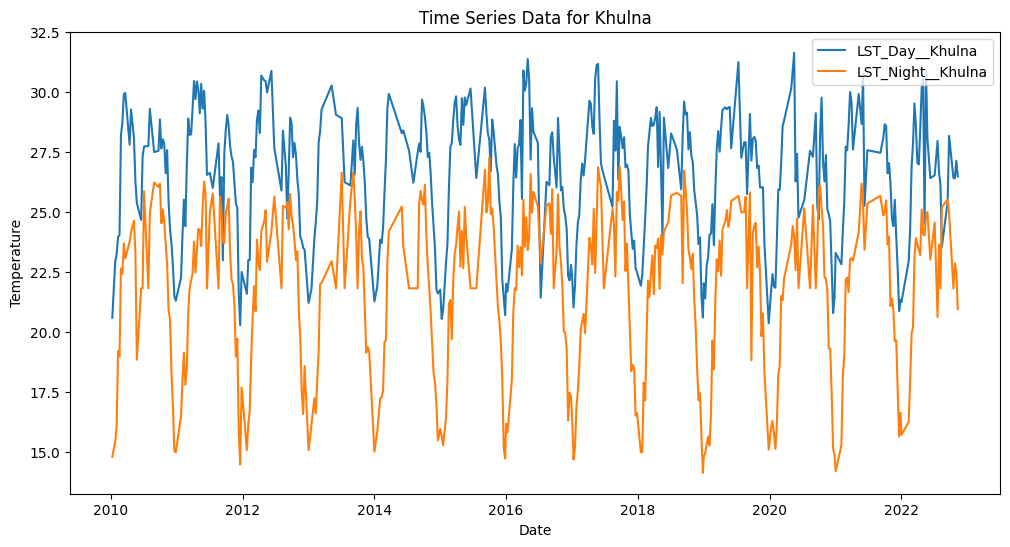

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Khulna'], label='LST_Day__Khulna')
plt.plot(LST_df_no_outliers['LST_Night__Khulna'], label='LST_Night__Khulna')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Khulna')
plt.legend()
plt.show()

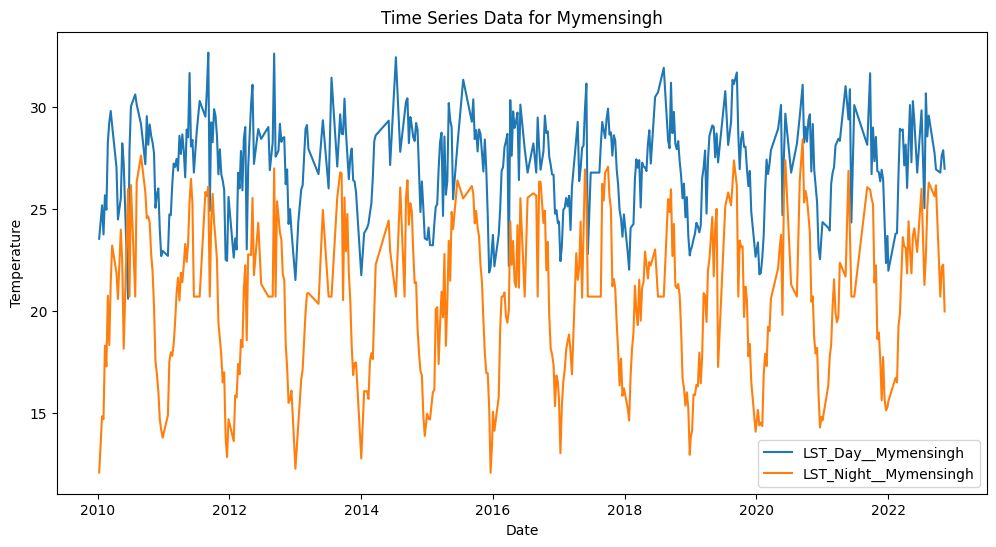

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Mymensingh'], label='LST_Day__Mymensingh')
plt.plot(LST_df_no_outliers['LST_Night__Mymensingh'], label='LST_Night__Mymensingh')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Mymensingh')
plt.legend()
plt.show()

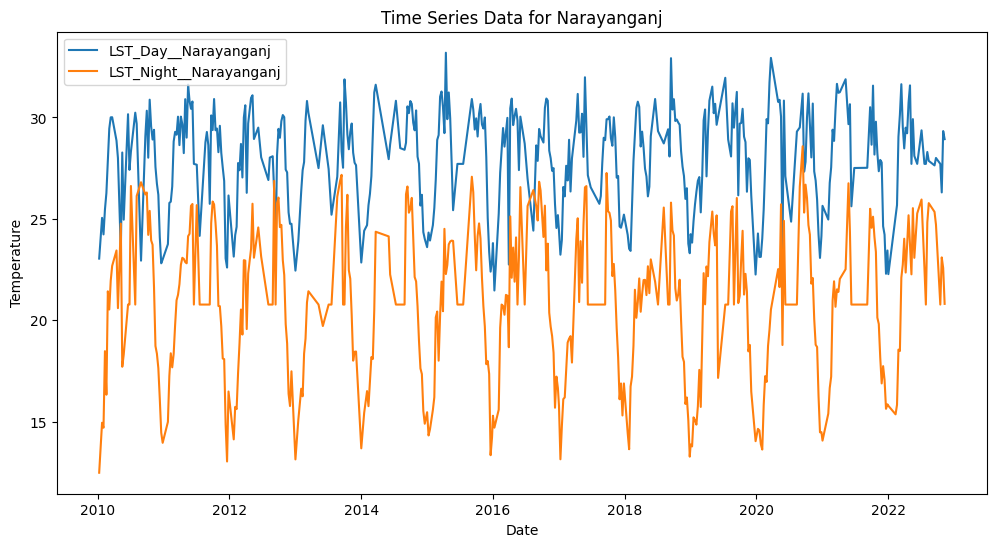

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Narayanganj'], label='LST_Day__Narayanganj')
plt.plot(LST_df_no_outliers['LST_Night__Narayanganj'], label='LST_Night__Narayanganj')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Narayanganj')
plt.legend()
plt.show()

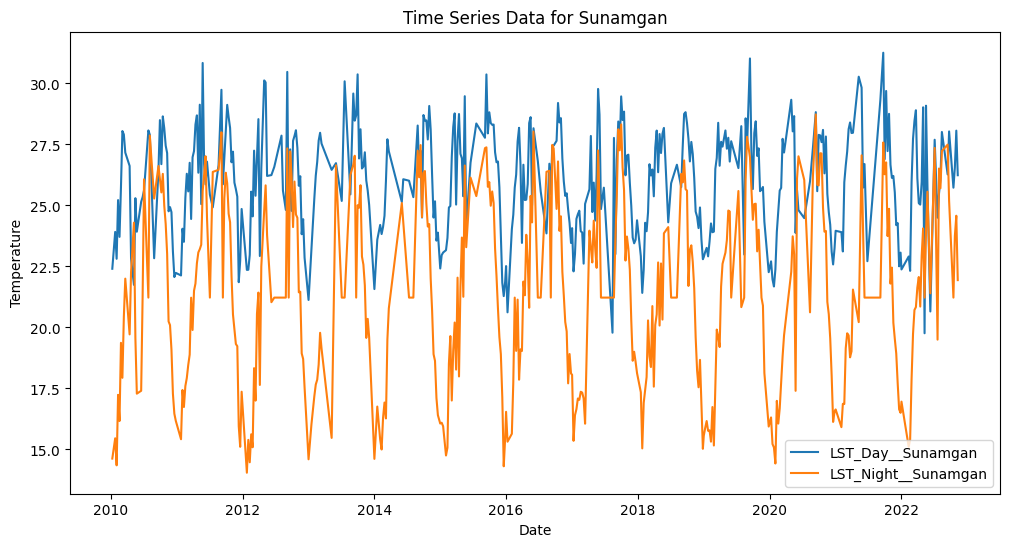

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Sunamgan'], label='LST_Day__Sunamgan')
plt.plot(LST_df_no_outliers['LST_Night__Sunamgan'], label='LST_Night__Sunamgan')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Sunamgan')
plt.legend()
plt.show()

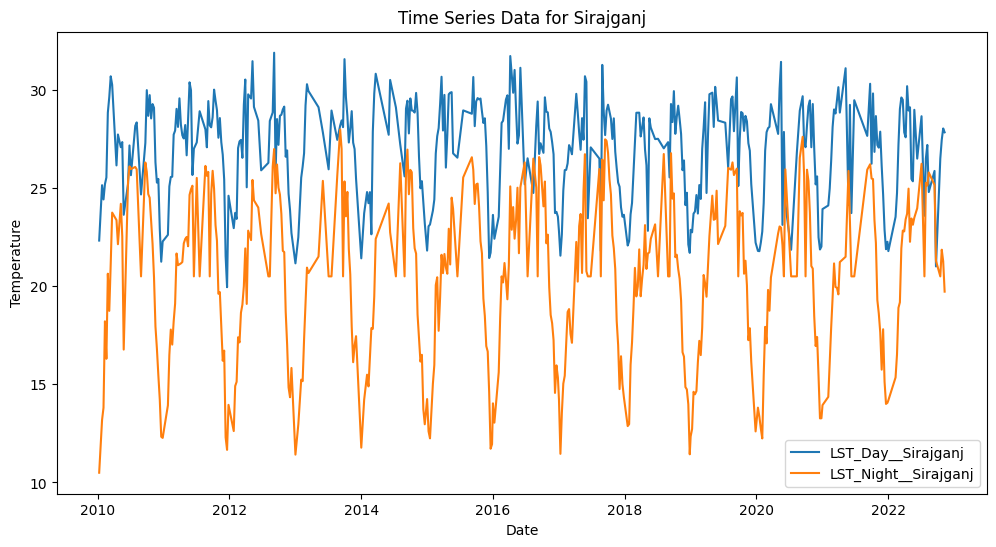

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(LST_df_no_outliers['LST_Day__Sirajganj'], label='LST_Day__Sirajganj')
plt.plot(LST_df_no_outliers['LST_Night__Sirajganj'], label='LST_Night__Sirajganj')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Time Series Data for Sirajganj')
plt.legend()
plt.show()

#### Time series Analysis plotted for selected districts as data is not consistent.Data collected for random days and District like Comilla,Bogra, Barisal LST data is not available